# 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

예시

주택 가격 예측

매출액 예측

In [3]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True) #e notation을 그냥 소수점으로 출력

In [4]:
from sklearn.datasets import load_boston

In [5]:
data = load_boston()
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [9]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [10]:
x_train.head()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
147  2.36862  0.0  19.58   0.0  0.871  4.926  95.7  1.4608  5.0  403.0   
227  0.41238  0.0   6.20   0.0  0.504  7.163  79.9  3.2157  8.0  307.0   
100  0.14866  0.0   8.56   0.0  0.520  6.727  79.9  2.7778  5.0  384.0   
32   1.38799  0.0   8.14   0.0  0.538  5.950  82.0  3.9900  4.0  307.0   
30   1.13081  0.0   8.14   0.0  0.538  5.713  94.1  4.2330  4.0  307.0   

     PTRATIO       B  LSTAT  
147     14.7  391.71  29.53  
227     17.4  372.08   6.36  
100     20.9  394.76   9.42  
32      21.0  232.60  27.71  
30      21.0  360.17  22.60

In [11]:
y_train.head()

147    14.6
227    31.6
100    27.5
32     13.2
30     12.7
Name: MEDV, dtype: float64

# 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값


### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값


### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값


In [12]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [13]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [14]:
my_mse(pred, actual)

4.0

In [15]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [16]:
my_mae(pred, actual)

2.0

In [17]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [18]:
my_rmse(pred, actual)

2.0

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [21]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression(n_jobs=-1) # 모든 코어를 다 사용

In [25]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [26]:
pred = model.predict(x_test)

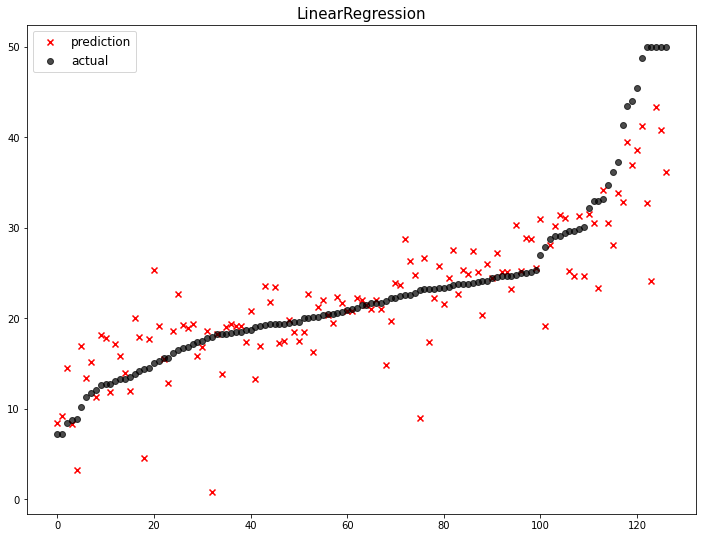

              model        mse
0  LinearRegression  26.943925


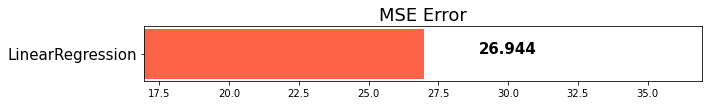

In [27]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다. 
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$ 

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [28]:
from sklearn.linear_model import Ridge

In [29]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

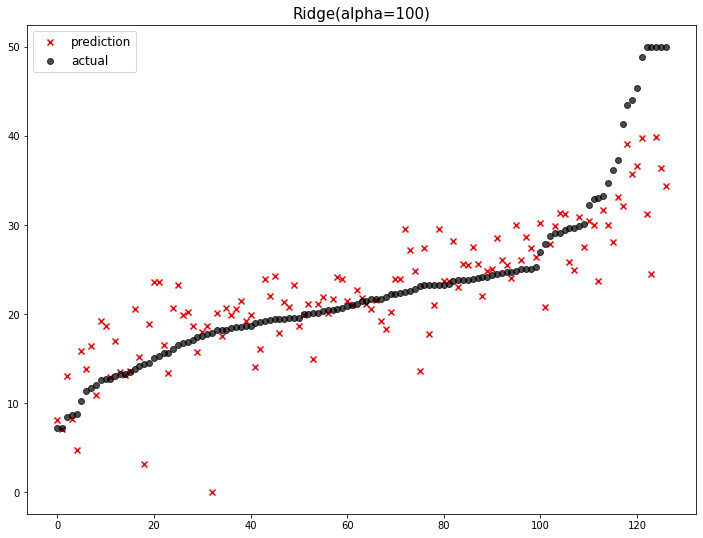

              model        mse
0  Ridge(alpha=100)  29.421974
1  LinearRegression  26.943925


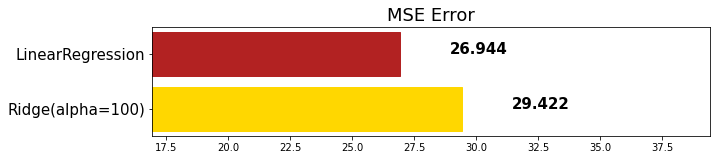

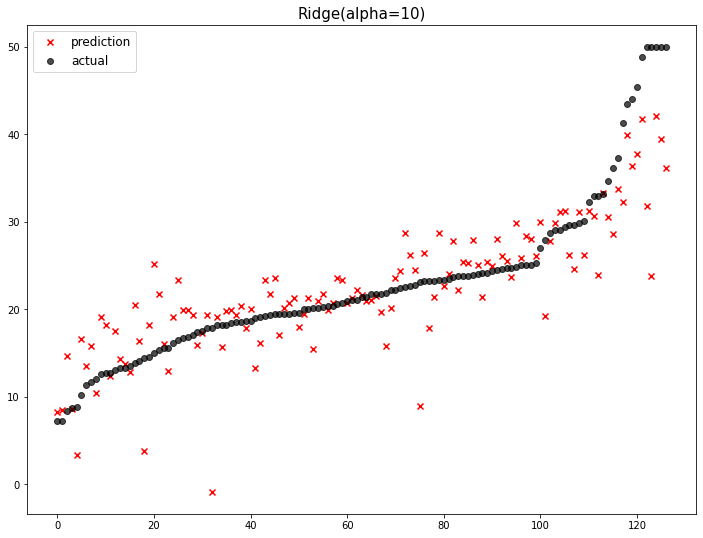

              model        mse
0  Ridge(alpha=100)  29.421974
1   Ridge(alpha=10)  28.412640
2  LinearRegression  26.943925


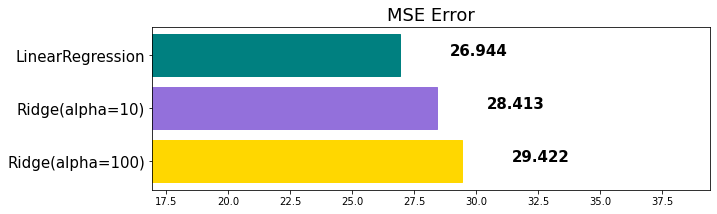

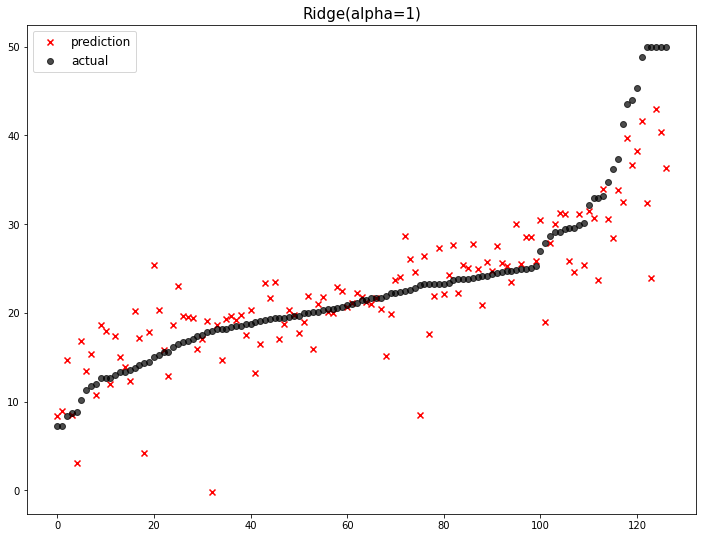

              model        mse
0  Ridge(alpha=100)  29.421974
1   Ridge(alpha=10)  28.412640
2    Ridge(alpha=1)  27.519149
3  LinearRegression  26.943925


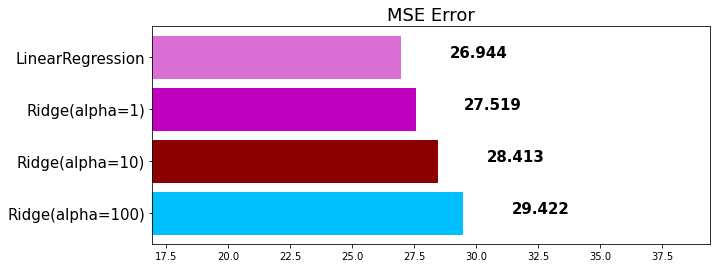

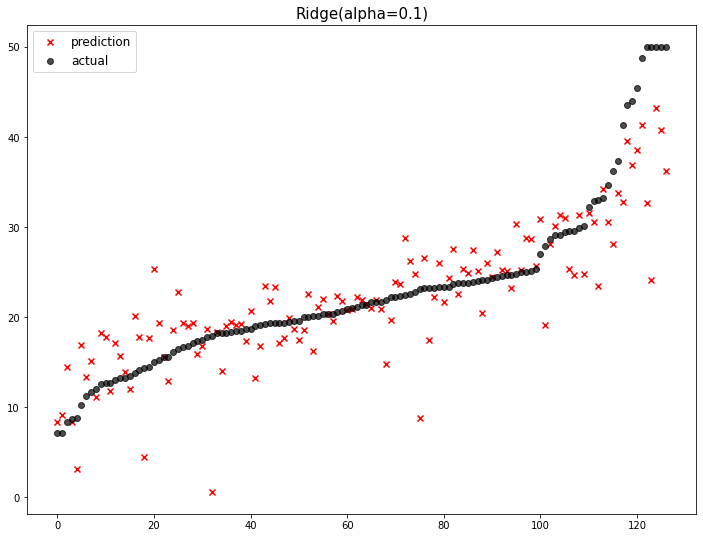

              model        mse
0  Ridge(alpha=100)  29.421974
1   Ridge(alpha=10)  28.412640
2    Ridge(alpha=1)  27.519149
3  Ridge(alpha=0.1)  27.018254
4  LinearRegression  26.943925


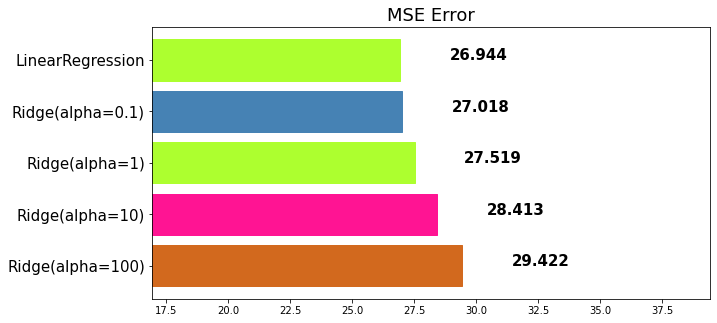

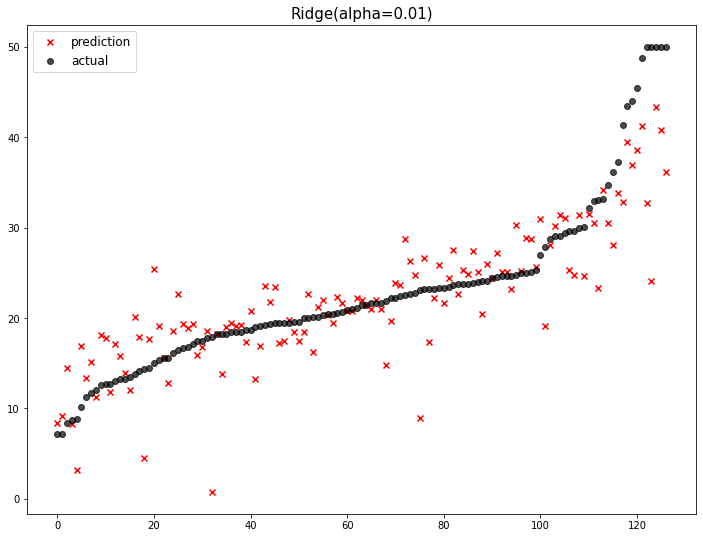

               model        mse
0   Ridge(alpha=100)  29.421974
1    Ridge(alpha=10)  28.412640
2     Ridge(alpha=1)  27.519149
3   Ridge(alpha=0.1)  27.018254
4  Ridge(alpha=0.01)  26.951444
5   LinearRegression  26.943925


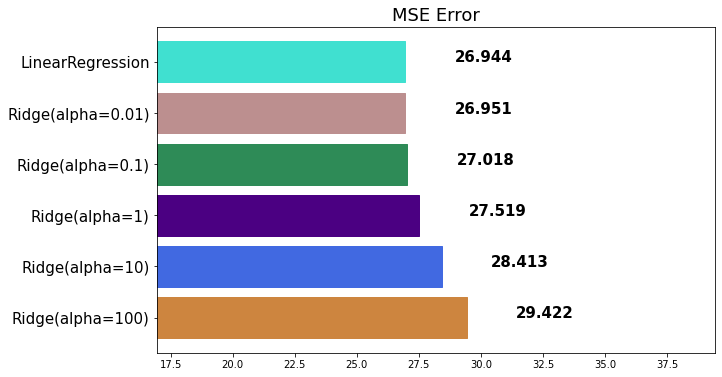

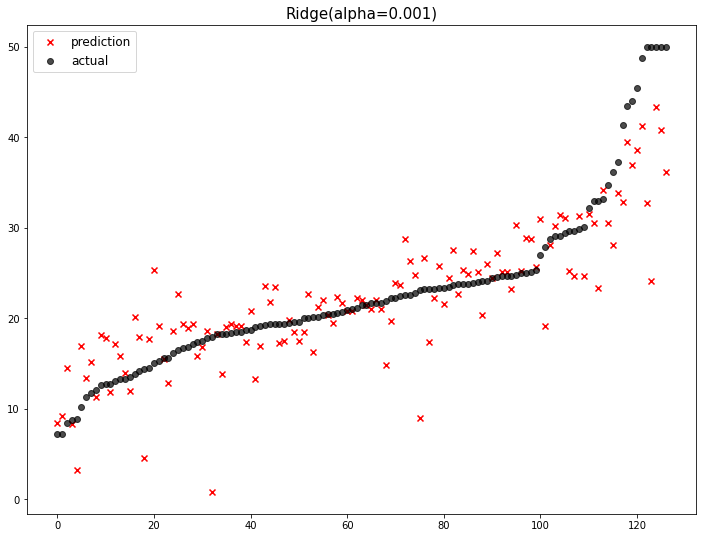

                model        mse
0    Ridge(alpha=100)  29.421974
1     Ridge(alpha=10)  28.412640
2      Ridge(alpha=1)  27.519149
3    Ridge(alpha=0.1)  27.018254
4   Ridge(alpha=0.01)  26.951444
5  Ridge(alpha=0.001)  26.944677
6    LinearRegression  26.943925


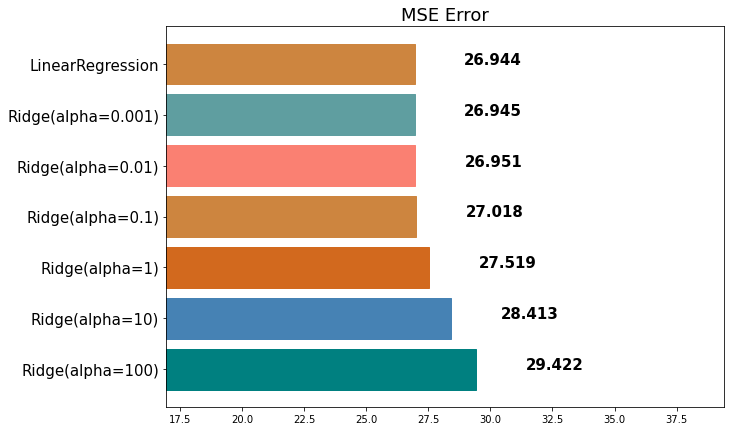

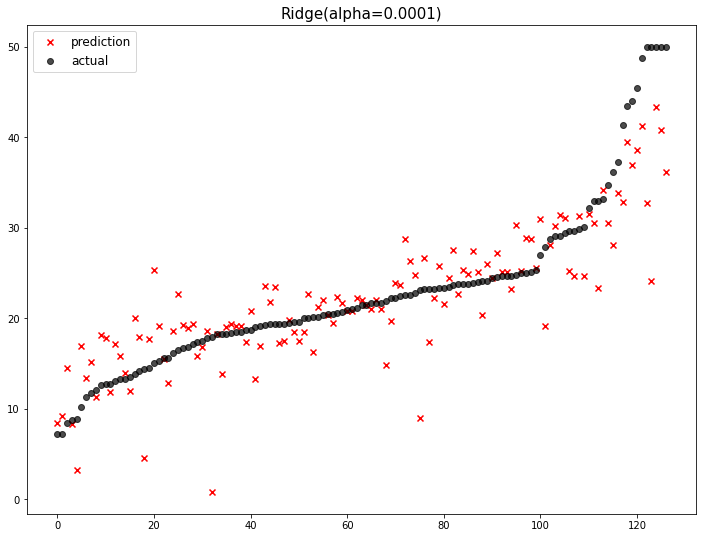

                 model        mse
0     Ridge(alpha=100)  29.421974
1      Ridge(alpha=10)  28.412640
2       Ridge(alpha=1)  27.519149
3     Ridge(alpha=0.1)  27.018254
4    Ridge(alpha=0.01)  26.951444
5   Ridge(alpha=0.001)  26.944677
6  Ridge(alpha=0.0001)  26.944000
7     LinearRegression  26.943925


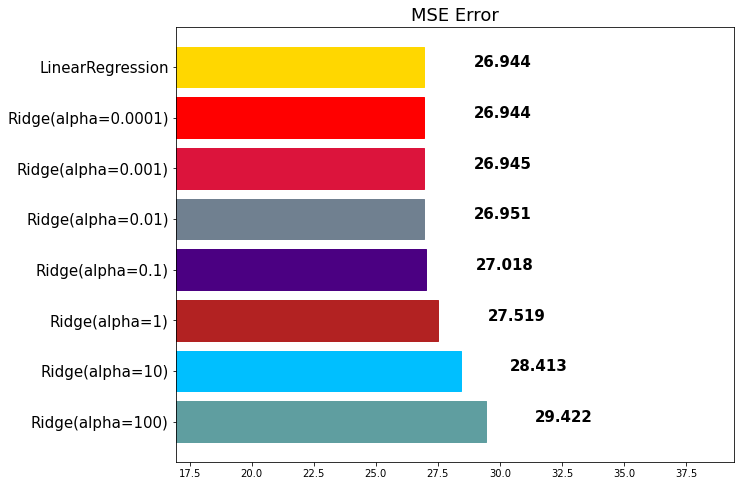

In [30]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [31]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [32]:
ridge.coef_

array([ -0.10038042,   0.03652251,   0.00354139,   1.53650984,
       -15.17034408,   4.13511321,  -0.01337295,  -1.44889035,
         0.26183341,  -0.01070666,  -0.96824426,   0.01183065,
        -0.47402322])

In [33]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

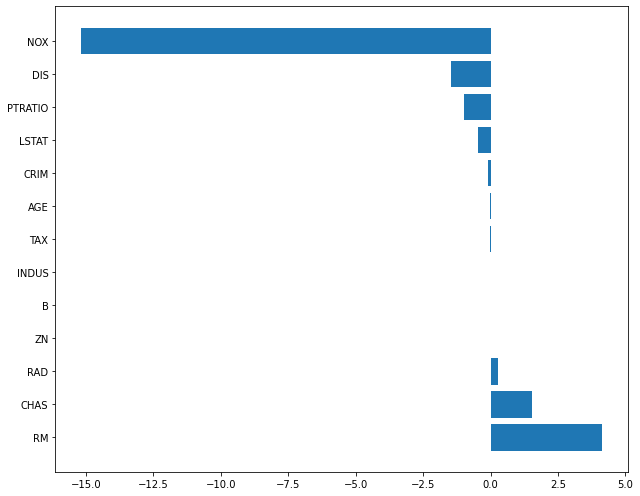

In [34]:
plot_coef(x_train.columns, ridge.coef_)

In [35]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

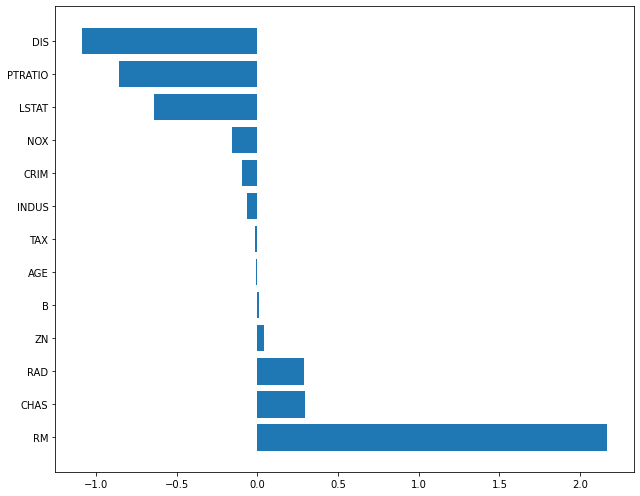

In [36]:
plot_coef(x_train.columns, ridge_100.coef_)

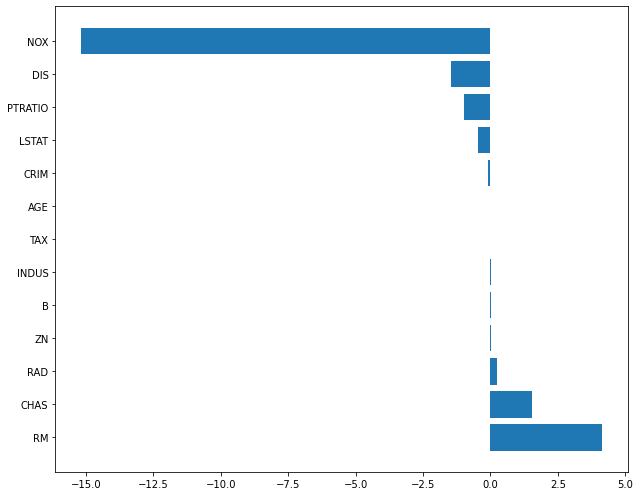

In [37]:
plot_coef(x_train.columns, ridge_001.coef_)

샘플 데이터의 수가 많다면 규제를 적게 주어도 일반화에 문제가 없지만, 데이터 수가 적다면 강한 규제를 걸어주는 것이 일반화에 좋다. (과적합을 피하기 위해)

In [38]:
from sklearn.linear_model import Lasso
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

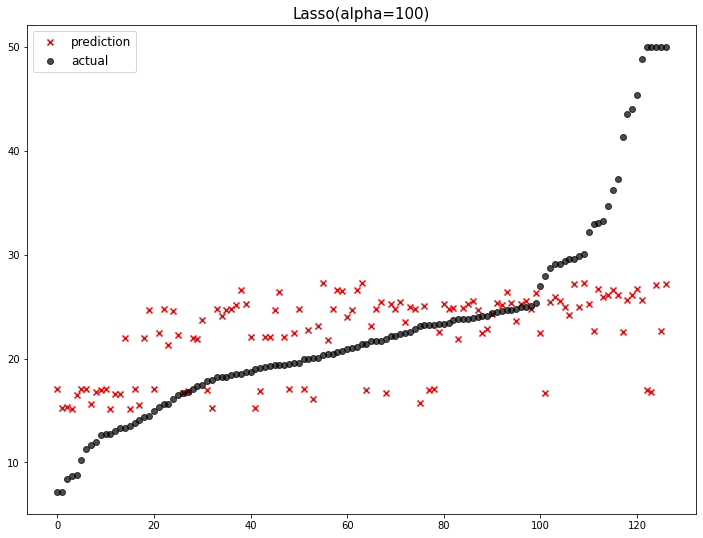

                 model        mse
0     Lasso(alpha=100)  69.257901
1     Ridge(alpha=100)  29.421974
2      Ridge(alpha=10)  28.412640
3       Ridge(alpha=1)  27.519149
4     Ridge(alpha=0.1)  27.018254
5    Ridge(alpha=0.01)  26.951444
6   Ridge(alpha=0.001)  26.944677
7  Ridge(alpha=0.0001)  26.944000
8     LinearRegression  26.943925


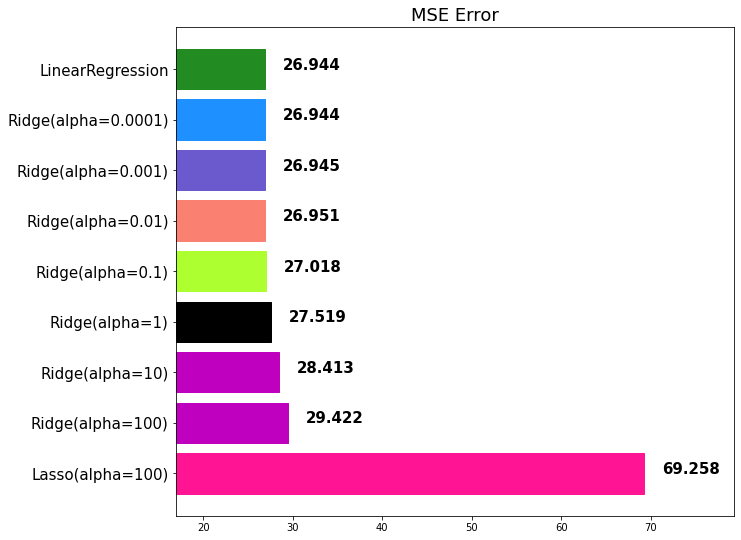

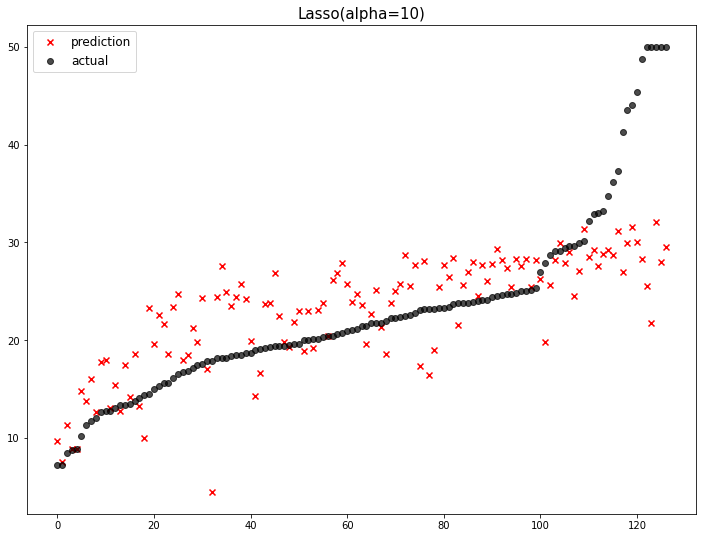

                 model        mse
0     Lasso(alpha=100)  69.257901
1      Lasso(alpha=10)  47.368052
2     Ridge(alpha=100)  29.421974
3      Ridge(alpha=10)  28.412640
4       Ridge(alpha=1)  27.519149
5     Ridge(alpha=0.1)  27.018254
6    Ridge(alpha=0.01)  26.951444
7   Ridge(alpha=0.001)  26.944677
8  Ridge(alpha=0.0001)  26.944000
9     LinearRegression  26.943925


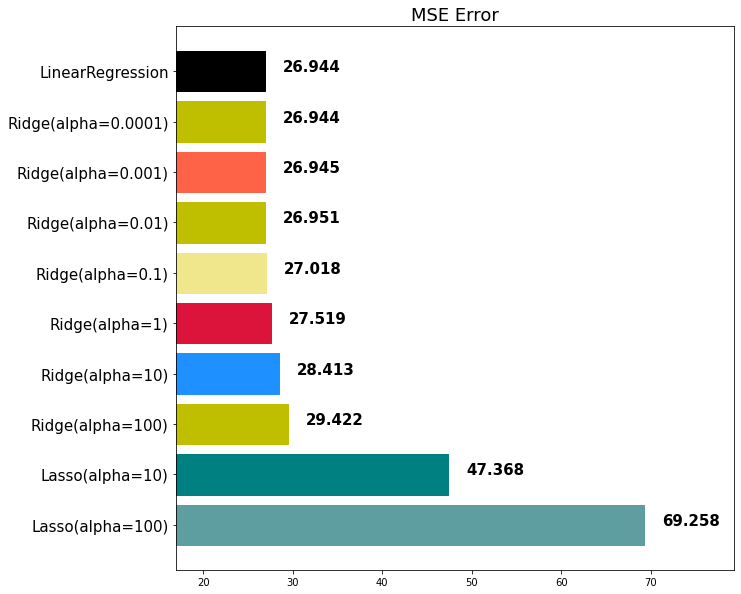

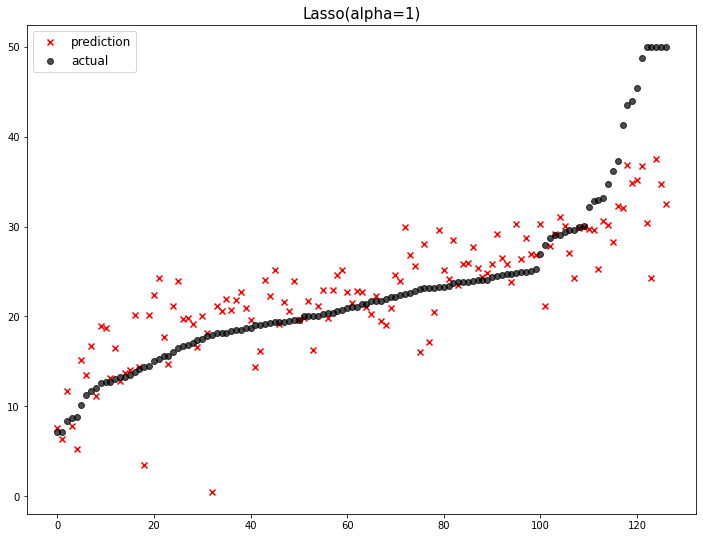

                  model        mse
0      Lasso(alpha=100)  69.257901
1       Lasso(alpha=10)  47.368052
2        Lasso(alpha=1)  32.081372
3      Ridge(alpha=100)  29.421974
4       Ridge(alpha=10)  28.412640
5        Ridge(alpha=1)  27.519149
6      Ridge(alpha=0.1)  27.018254
7     Ridge(alpha=0.01)  26.951444
8    Ridge(alpha=0.001)  26.944677
9   Ridge(alpha=0.0001)  26.944000
10     LinearRegression  26.943925


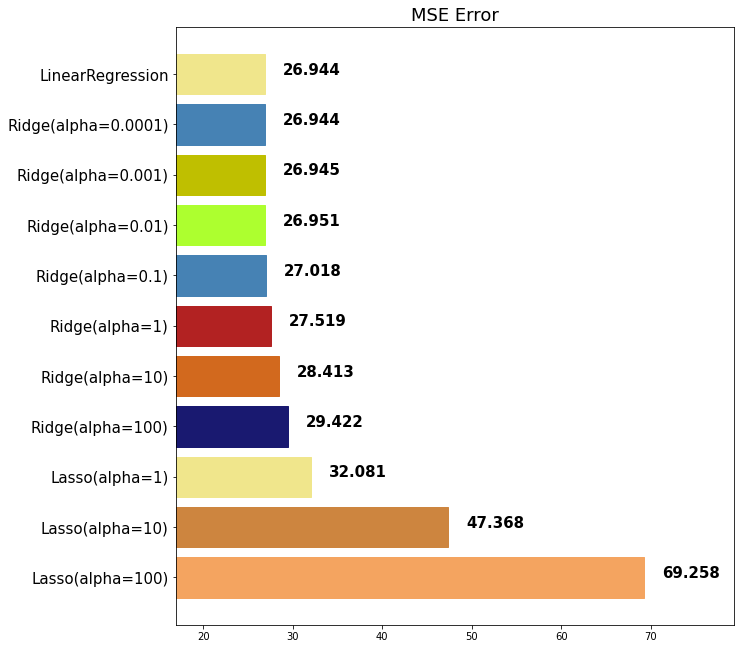

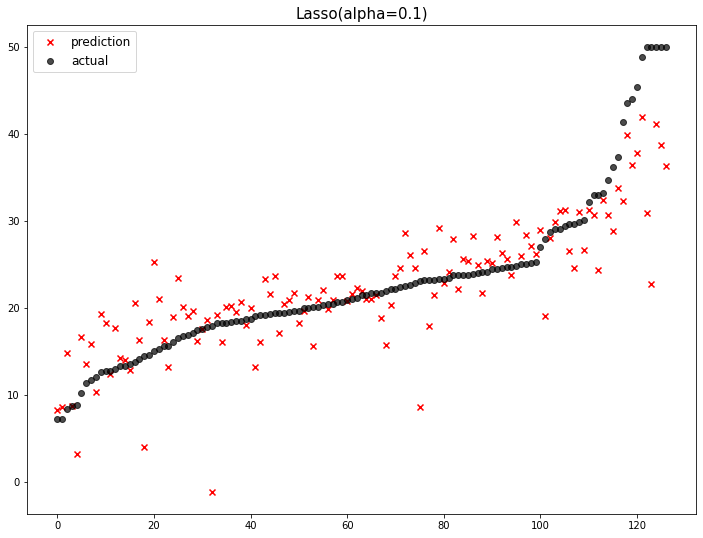

                  model        mse
0      Lasso(alpha=100)  69.257901
1       Lasso(alpha=10)  47.368052
2        Lasso(alpha=1)  32.081372
3      Lasso(alpha=0.1)  29.438430
4      Ridge(alpha=100)  29.421974
5       Ridge(alpha=10)  28.412640
6        Ridge(alpha=1)  27.519149
7      Ridge(alpha=0.1)  27.018254
8     Ridge(alpha=0.01)  26.951444
9    Ridge(alpha=0.001)  26.944677
10  Ridge(alpha=0.0001)  26.944000
11     LinearRegression  26.943925


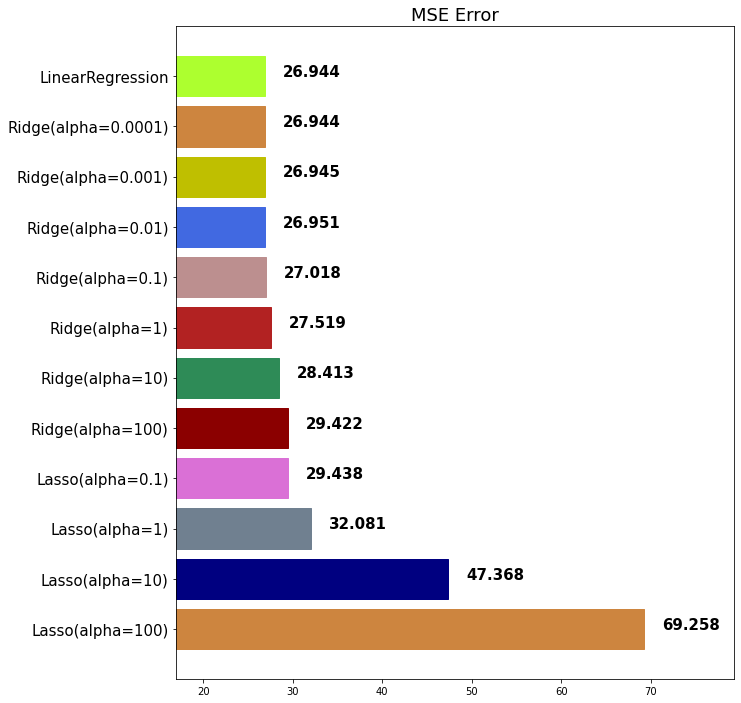

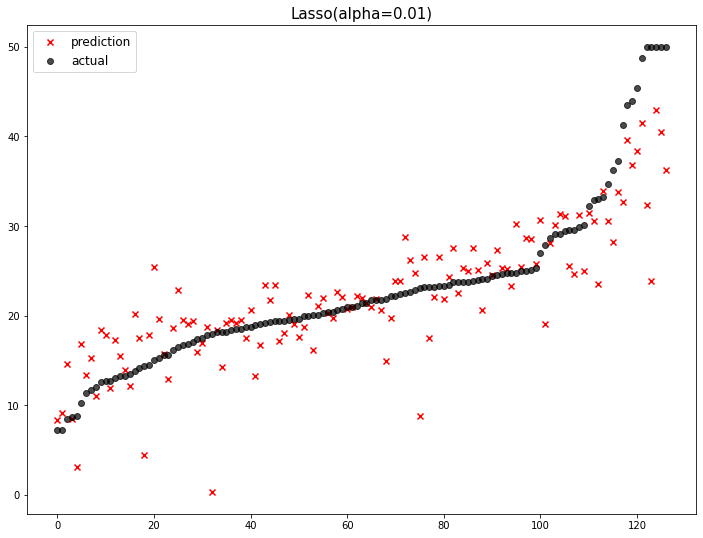

                  model        mse
0      Lasso(alpha=100)  69.257901
1       Lasso(alpha=10)  47.368052
2        Lasso(alpha=1)  32.081372
3      Lasso(alpha=0.1)  29.438430
4      Ridge(alpha=100)  29.421974
5       Ridge(alpha=10)  28.412640
6        Ridge(alpha=1)  27.519149
7     Lasso(alpha=0.01)  27.257623
8      Ridge(alpha=0.1)  27.018254
9     Ridge(alpha=0.01)  26.951444
10   Ridge(alpha=0.001)  26.944677
11  Ridge(alpha=0.0001)  26.944000
12     LinearRegression  26.943925


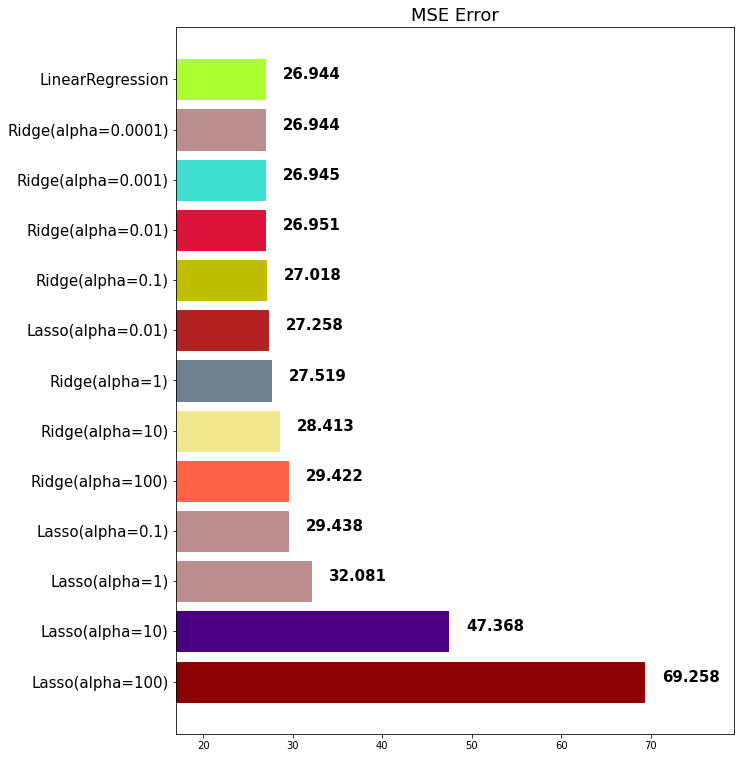

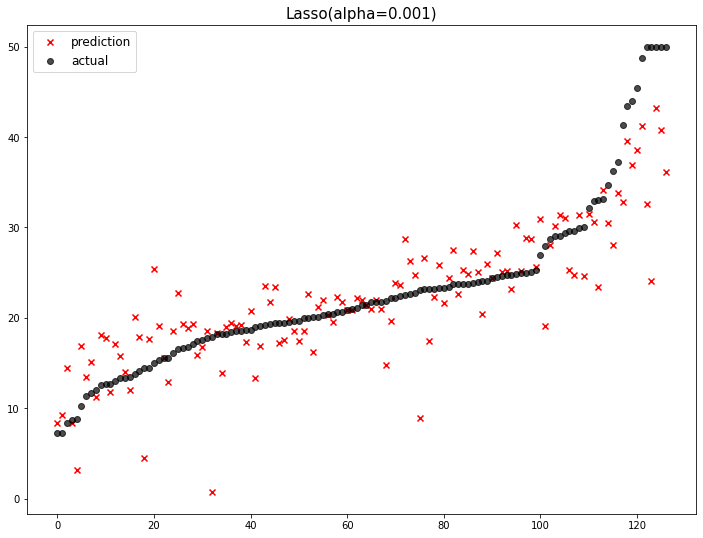

                  model        mse
0      Lasso(alpha=100)  69.257901
1       Lasso(alpha=10)  47.368052
2        Lasso(alpha=1)  32.081372
3      Lasso(alpha=0.1)  29.438430
4      Ridge(alpha=100)  29.421974
5       Ridge(alpha=10)  28.412640
6        Ridge(alpha=1)  27.519149
7     Lasso(alpha=0.01)  27.257623
8      Ridge(alpha=0.1)  27.018254
9    Lasso(alpha=0.001)  26.971656
10    Ridge(alpha=0.01)  26.951444
11   Ridge(alpha=0.001)  26.944677
12  Ridge(alpha=0.0001)  26.944000
13     LinearRegression  26.943925


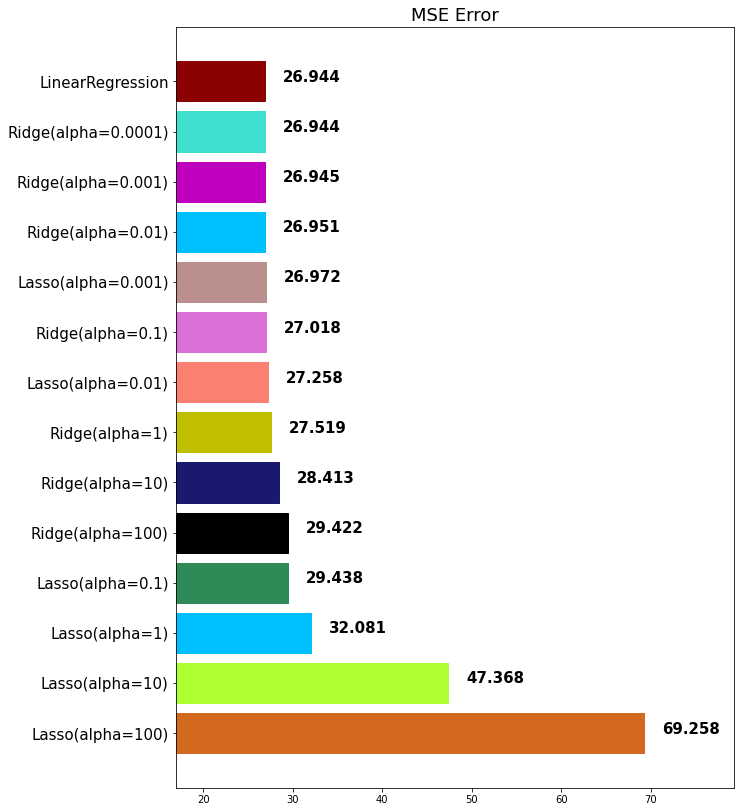

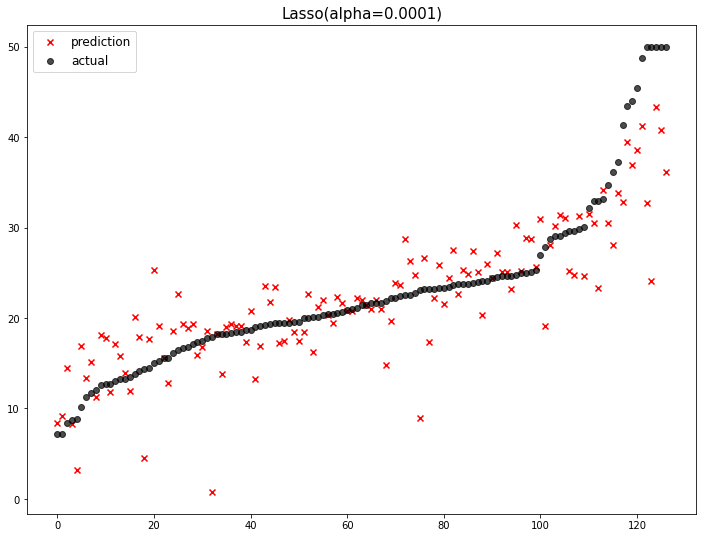

                  model        mse
0      Lasso(alpha=100)  69.257901
1       Lasso(alpha=10)  47.368052
2        Lasso(alpha=1)  32.081372
3      Lasso(alpha=0.1)  29.438430
4      Ridge(alpha=100)  29.421974
5       Ridge(alpha=10)  28.412640
6        Ridge(alpha=1)  27.519149
7     Lasso(alpha=0.01)  27.257623
8      Ridge(alpha=0.1)  27.018254
9    Lasso(alpha=0.001)  26.971656
10    Ridge(alpha=0.01)  26.951444
11  Lasso(alpha=0.0001)  26.946658
12   Ridge(alpha=0.001)  26.944677
13  Ridge(alpha=0.0001)  26.944000
14     LinearRegression  26.943925


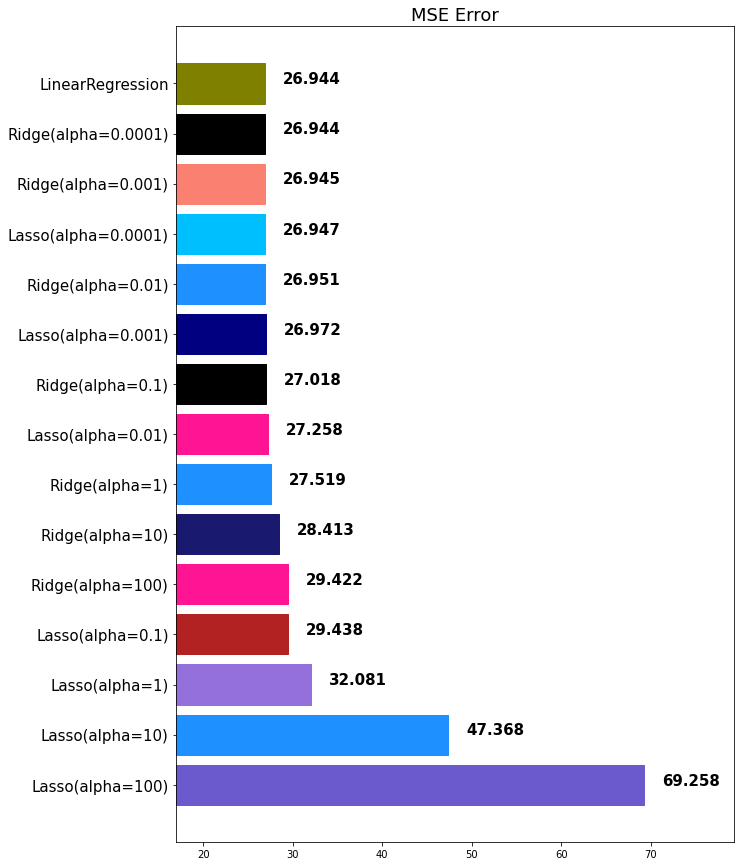

In [39]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [40]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

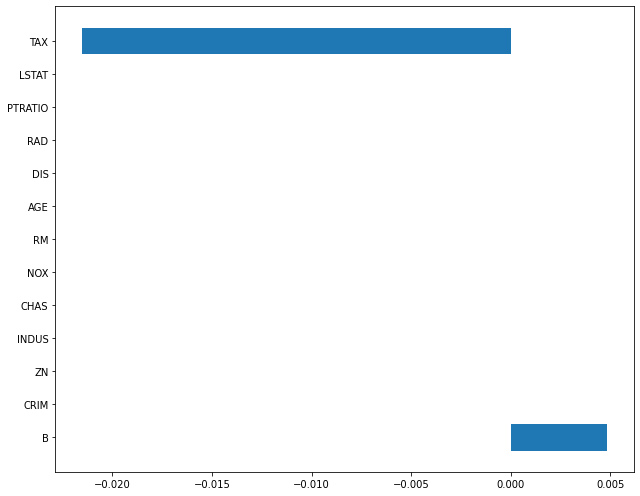

In [41]:
plot_coef(x_train.columns, lasso_100.coef_)

In [42]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02154411,
       -0.        ,  0.00486017, -0.        ])

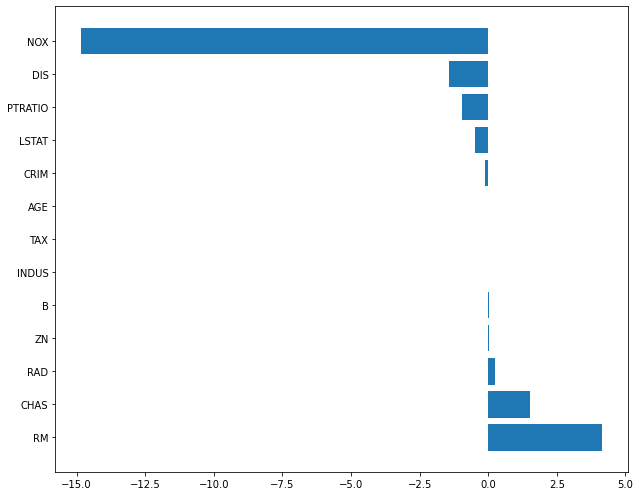

In [43]:
plot_coef(x_train.columns, lasso_001.coef_)

In [44]:
lasso_001.coef_

array([ -0.10019696,   0.03652598,   0.00219066,   1.51652954,
       -14.82589572,   4.13484921,  -0.01358261,  -1.44227938,
         0.26113355,  -0.01074193,  -0.96440194,   0.01184774,
        -0.47481375])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용). 
 * l1_ratio = 1 (L1 규제만 사용). 
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [45]:
from sklearn.linear_model import ElasticNet

In [46]:
ratios = [0.2, 0.5, 0.8]

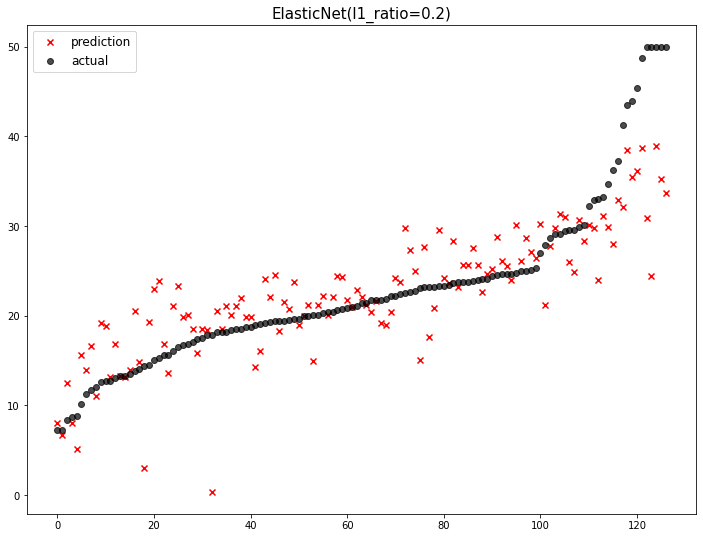

                       model        mse
0           Lasso(alpha=100)  69.257901
1            Lasso(alpha=10)  47.368052
2             Lasso(alpha=1)  32.081372
3   ElasticNet(l1_ratio=0.2)  30.300819
4           Lasso(alpha=0.1)  29.438430
5           Ridge(alpha=100)  29.421974
6            Ridge(alpha=10)  28.412640
7             Ridge(alpha=1)  27.519149
8          Lasso(alpha=0.01)  27.257623
9           Ridge(alpha=0.1)  27.018254
10        Lasso(alpha=0.001)  26.971656
11         Ridge(alpha=0.01)  26.951444
12       Lasso(alpha=0.0001)  26.946658
13        Ridge(alpha=0.001)  26.944677
14       Ridge(alpha=0.0001)  26.944000
15          LinearRegression  26.943925


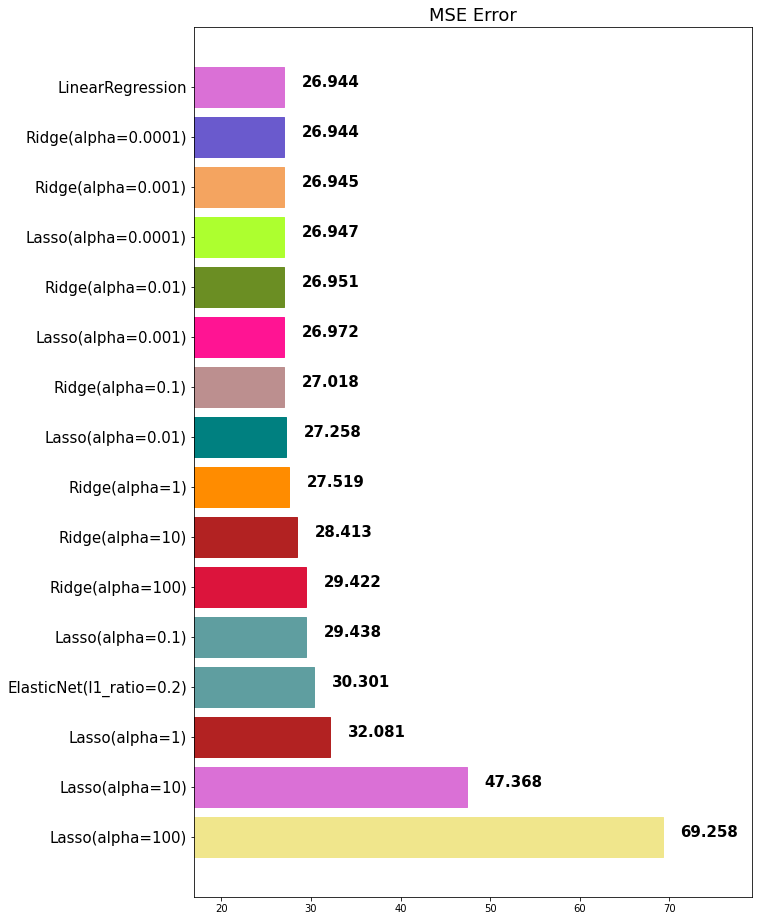

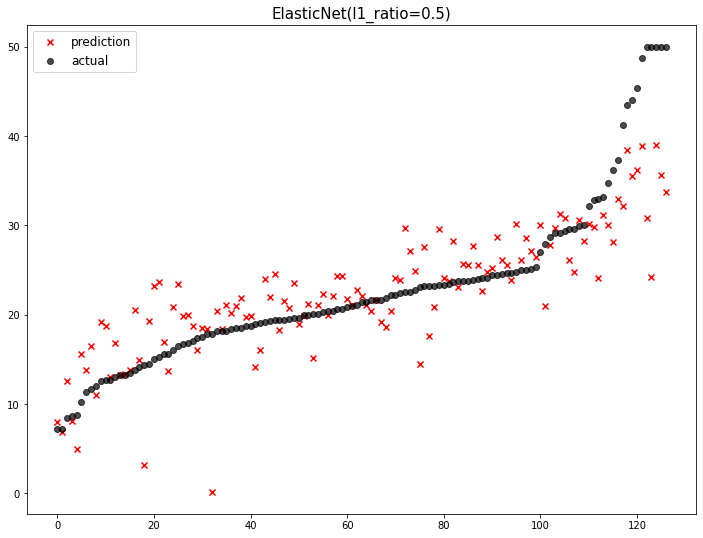

                       model        mse
0           Lasso(alpha=100)  69.257901
1            Lasso(alpha=10)  47.368052
2             Lasso(alpha=1)  32.081372
3   ElasticNet(l1_ratio=0.2)  30.300819
4   ElasticNet(l1_ratio=0.5)  30.182668
5           Lasso(alpha=0.1)  29.438430
6           Ridge(alpha=100)  29.421974
7            Ridge(alpha=10)  28.412640
8             Ridge(alpha=1)  27.519149
9          Lasso(alpha=0.01)  27.257623
10          Ridge(alpha=0.1)  27.018254
11        Lasso(alpha=0.001)  26.971656
12         Ridge(alpha=0.01)  26.951444
13       Lasso(alpha=0.0001)  26.946658
14        Ridge(alpha=0.001)  26.944677
15       Ridge(alpha=0.0001)  26.944000
16          LinearRegression  26.943925


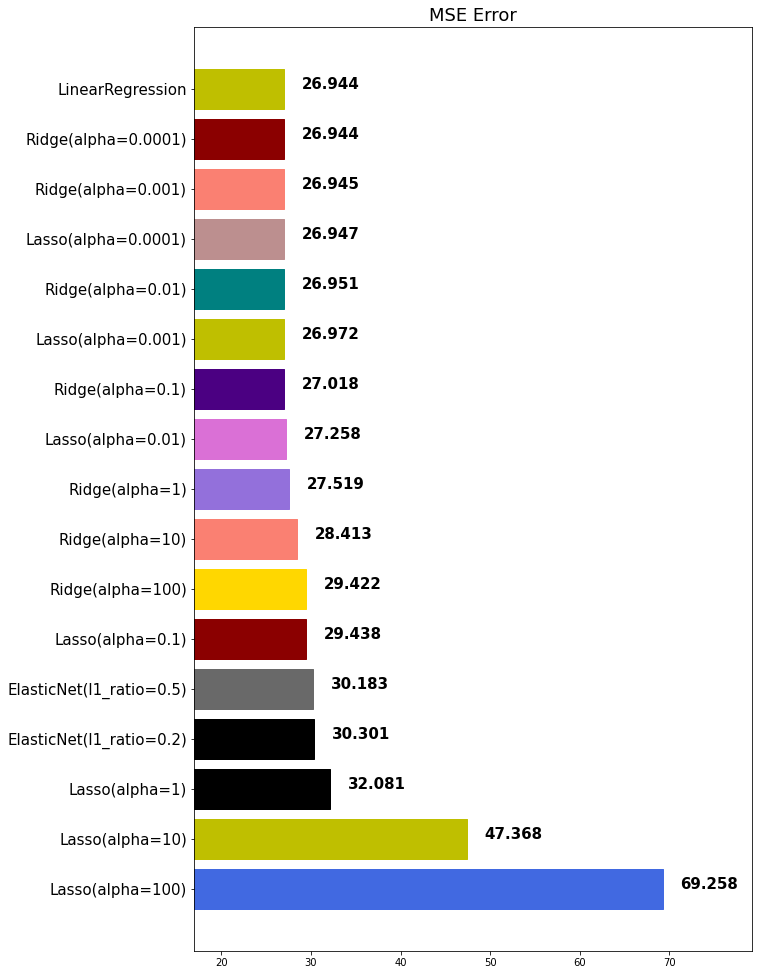

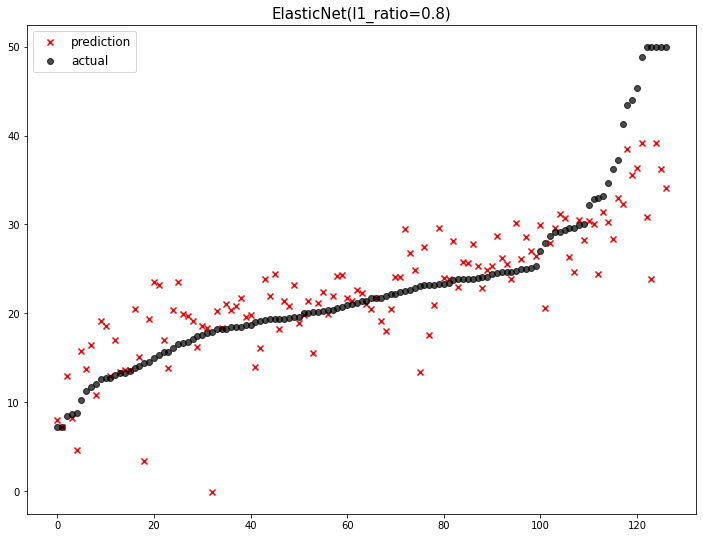

                       model        mse
0           Lasso(alpha=100)  69.257901
1            Lasso(alpha=10)  47.368052
2             Lasso(alpha=1)  32.081372
3   ElasticNet(l1_ratio=0.2)  30.300819
4   ElasticNet(l1_ratio=0.5)  30.182668
5   ElasticNet(l1_ratio=0.8)  29.986483
6           Lasso(alpha=0.1)  29.438430
7           Ridge(alpha=100)  29.421974
8            Ridge(alpha=10)  28.412640
9             Ridge(alpha=1)  27.519149
10         Lasso(alpha=0.01)  27.257623
11          Ridge(alpha=0.1)  27.018254
12        Lasso(alpha=0.001)  26.971656
13         Ridge(alpha=0.01)  26.951444
14       Lasso(alpha=0.0001)  26.946658
15        Ridge(alpha=0.001)  26.944677
16       Ridge(alpha=0.0001)  26.944000
17          LinearRegression  26.943925


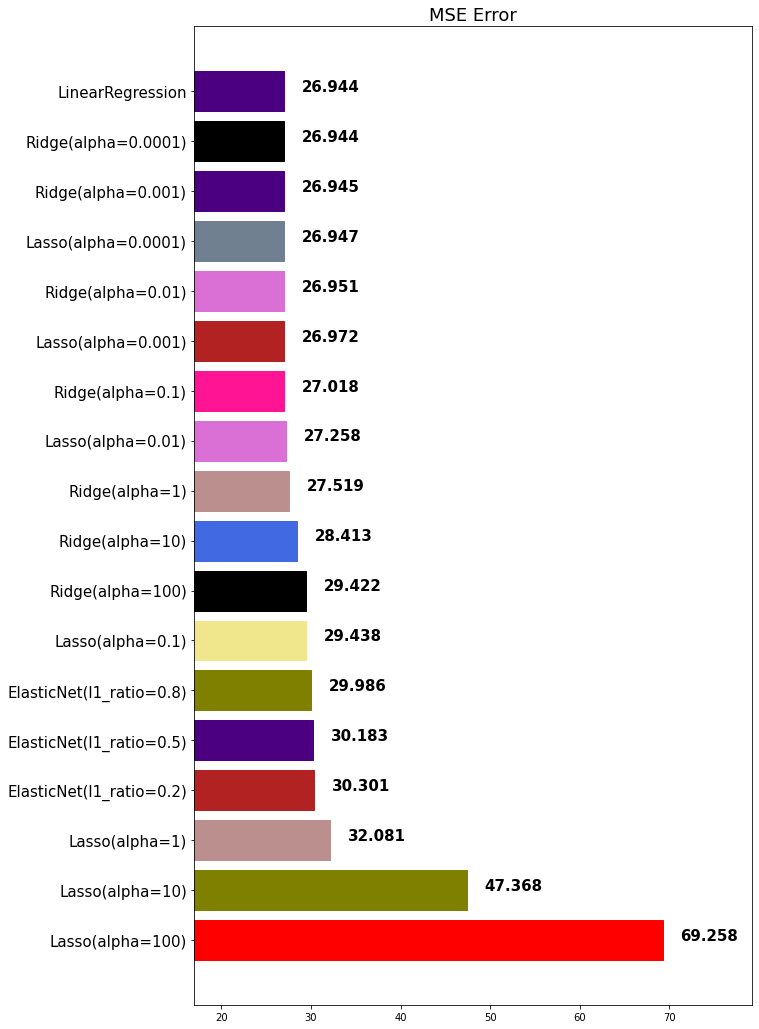

In [47]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [48]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

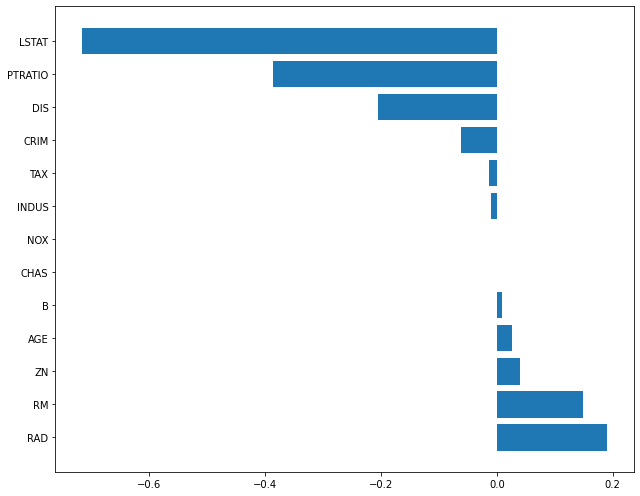

In [49]:
plot_coef(x_train.columns, elsticnet_20.coef_)

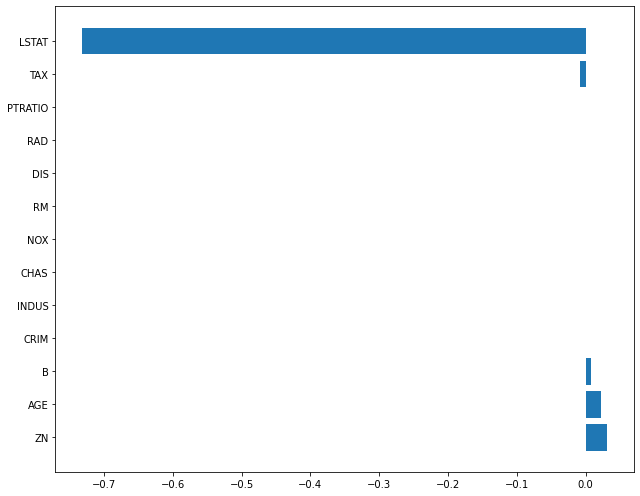

In [50]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [51]:
elsticnet_80.coef_

array([-0.        ,  0.03170267, -0.        ,  0.        ,  0.        ,
        0.        ,  0.02317575, -0.        ,  0.        , -0.00829958,
       -0.        ,  0.00782526, -0.73246484])

## Scaler

데이터 전처리 과정, raw data의 Scale을 맞춰줘서 예측값의 정확도를 높이기 위한 기법

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [53]:
x_train.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     3.760456   11.439314   11.035963    0.063325    0.554290    6.294227   
std      9.445441   22.930947    6.846968    0.243868    0.115291    0.708621   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083390    0.000000    5.130000    0.000000    0.449000    5.877000   
50%      0.259150    0.000000    9.690000    0.000000    0.532000    6.216000   
75%      3.604340   19.000000   18.100000    0.000000    0.624000    6.632500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    69.276517    3.743230    9.543536  407.786280   18.371504  358.234090   
std     27.386935    2.028272    8.667892  167.933705    2.180695   90.086702   
min      2.900000    1.137000    1.000000  188.000000   12.600000    0.320000   
25%     45.750000    2.093450    4.000000  278.000000   17.150000  376.125000   
50%     77.800000    3.215700    5.000000  330.000000   18.700000  392.400000   
75%     94.100000    5.116700   24.000000  666.000000   20.200000  396.900000   
max    100.000000   10.710300   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  379.000000  
mean    12.901451  
std      7.279047  
min      1.730000  
25%      7.200000  
50%     11.410000  
75%     17.510000  
max     37.970000

### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [54]:
std_scaler = StandardScaler()

In [55]:
std_scaled = std_scaler.fit_transform(x_train)

In [56]:
round(pd.DataFrame(std_scaled).describe(), 2)

0       1       2       3       4       5       6       7       8   \
count  379.00  379.00  379.00  379.00  379.00  379.00  379.00  379.00  379.00   
mean    -0.00   -0.00    0.00    0.00   -0.00   -0.00   -0.00    0.00    0.00   
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -0.40   -0.50   -1.55   -0.26   -1.47   -3.86   -2.43   -1.29   -0.99   
25%     -0.39   -0.50   -0.86   -0.26   -0.91   -0.59   -0.86   -0.81   -0.64   
50%     -0.37   -0.50   -0.20   -0.26   -0.19   -0.11    0.31   -0.26   -0.52   
75%     -0.02    0.33    1.03   -0.26    0.61    0.48    0.91    0.68    1.67   
max      9.03    3.87    2.44    3.85    2.75    3.51    1.12    3.44    1.67   

           9       10      11      12  
count  379.00  379.00  379.00  379.00  
mean     0.00    0.00   -0.00   -0.00  
std      1.00    1.00    1.00    1.00  
min     -1.31   -2.65   -3.98   -1.54  
25%     -0.77   -0.56    0.20   -0.78  
50%     -0.46    0.15    0.38   -0.21  
75%      1.54    0.84    0.43    0.63  
max      1.81    1.67    0.43    3.45

### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [57]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [58]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

0       1       2       3       4       5       6       7       8   \
count  379.00  379.00  379.00  379.00  379.00  379.00  379.00  379.00  379.00   
mean     0.04    0.11    0.39    0.06    0.35    0.52    0.68    0.27    0.37   
std      0.11    0.23    0.25    0.24    0.24    0.14    0.28    0.21    0.38   
min      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
25%      0.00    0.00    0.17    0.00    0.13    0.44    0.44    0.10    0.13   
50%      0.00    0.00    0.34    0.00    0.30    0.51    0.77    0.22    0.17   
75%      0.04    0.19    0.65    0.00    0.49    0.59    0.94    0.42    1.00   
max      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   

           9       10      11      12  
count  379.00  379.00  379.00  379.00  
mean     0.42    0.61    0.90    0.31  
std      0.32    0.23    0.23    0.20  
min      0.00    0.00    0.00    0.00  
25%      0.17    0.48    0.95    0.15  
50%      0.27    0.65    0.99    0.27  
75%      0.91    0.81    1.00    0.44  
max      1.00    1.00    1.00    1.00

### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [59]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [60]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [61]:
from sklearn.pipeline import make_pipeline

In [62]:
# 스케일링과 회귀예측을 한번에

# R의 chain과 비슷?

elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [63]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

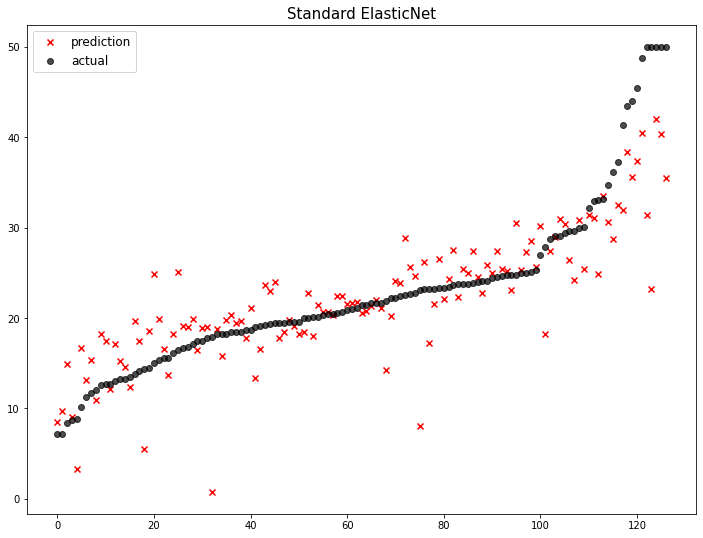

                       model        mse
0           Lasso(alpha=100)  69.257901
1            Lasso(alpha=10)  47.368052
2             Lasso(alpha=1)  32.081372
3   ElasticNet(l1_ratio=0.2)  30.300819
4   ElasticNet(l1_ratio=0.5)  30.182668
5   ElasticNet(l1_ratio=0.8)  29.986483
6           Lasso(alpha=0.1)  29.438430
7           Ridge(alpha=100)  29.421974
8        Standard ElasticNet  28.515383
9            Ridge(alpha=10)  28.412640
10            Ridge(alpha=1)  27.519149
11         Lasso(alpha=0.01)  27.257623
12          Ridge(alpha=0.1)  27.018254
13        Lasso(alpha=0.001)  26.971656
14         Ridge(alpha=0.01)  26.951444
15       Lasso(alpha=0.0001)  26.946658
16        Ridge(alpha=0.001)  26.944677
17       Ridge(alpha=0.0001)  26.944000
18          LinearRegression  26.943925


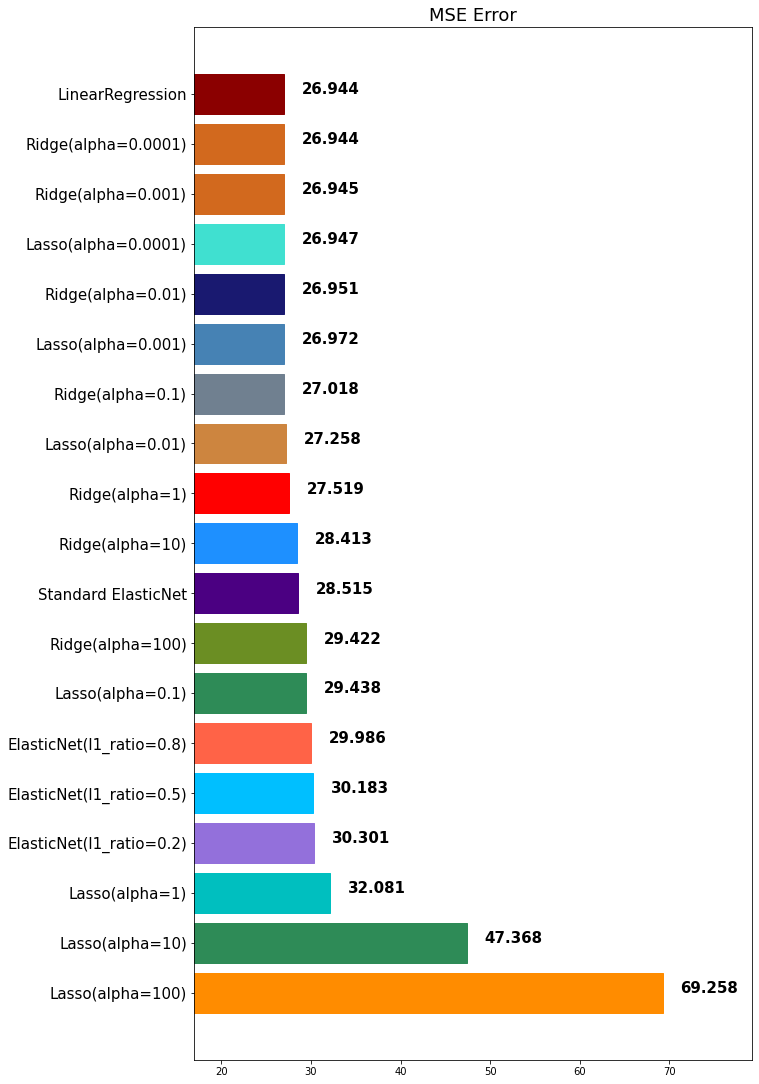

In [64]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

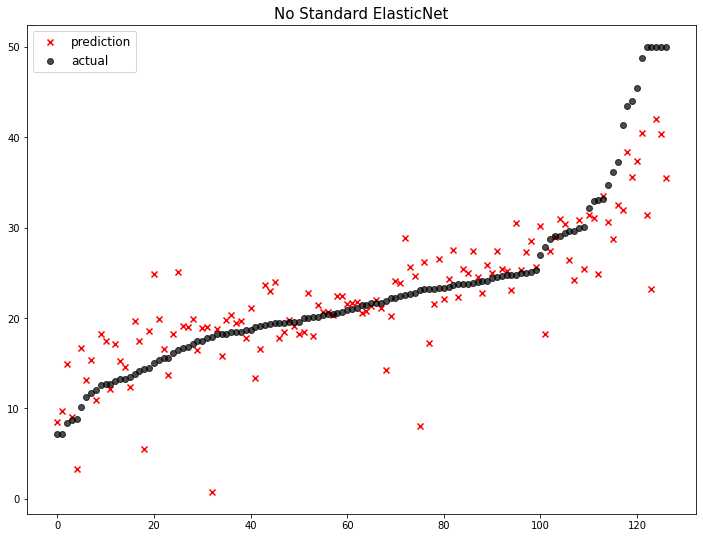

                       model        mse
0           Lasso(alpha=100)  69.257901
1            Lasso(alpha=10)  47.368052
2             Lasso(alpha=1)  32.081372
3   ElasticNet(l1_ratio=0.2)  30.300819
4   ElasticNet(l1_ratio=0.5)  30.182668
5   ElasticNet(l1_ratio=0.8)  29.986483
6           Lasso(alpha=0.1)  29.438430
7           Ridge(alpha=100)  29.421974
8        Standard ElasticNet  28.515383
9     No Standard ElasticNet  28.515383
10           Ridge(alpha=10)  28.412640
11            Ridge(alpha=1)  27.519149
12         Lasso(alpha=0.01)  27.257623
13          Ridge(alpha=0.1)  27.018254
14        Lasso(alpha=0.001)  26.971656
15         Ridge(alpha=0.01)  26.951444
16       Lasso(alpha=0.0001)  26.946658
17        Ridge(alpha=0.001)  26.944677
18       Ridge(alpha=0.0001)  26.944000
19          LinearRegression  26.943925


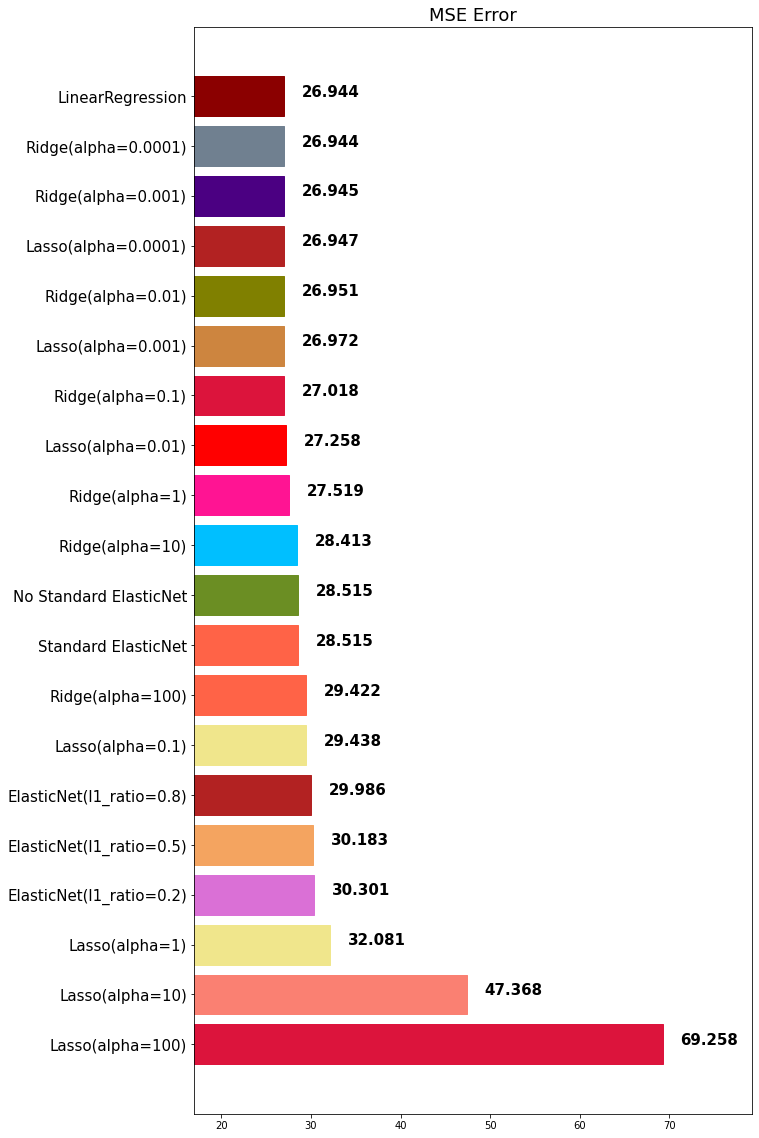

In [65]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features


다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

서로 영향을 주는 feature들의 상호작용을 고려하면 머신러닝의 성능이 올라갈 수 있다.

교호작용? 그럼 다중공산성은?

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [68]:
poly_features = poly.fit_transform(x_train)[0]

In [69]:
poly_features

array([     2.36862   ,      0.        ,     19.58      ,      0.        ,
            0.871     ,      4.926     ,     95.7       ,      1.4608    ,
            5.        ,    403.        ,     14.7       ,    391.71      ,
           29.53      ,      5.6103607 ,      0.        ,     46.3775796 ,
            0.        ,      2.06306802,     11.66782212,    226.676934  ,
            3.4600801 ,     11.8431    ,    954.55386   ,     34.818714  ,
          927.8121402 ,     69.9453486 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    383.3764    ,      0.        ,
           17.05418   ,     96.45108   ,   1873.806     ,     28.602464  ,
           97.9       ,   7890.74      ,    287.826     ,   7669.6818    ,
          578.1974    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [70]:
x_train.iloc[0]

CRIM         2.36862
ZN           0.00000
INDUS       19.58000
CHAS         0.00000
NOX          0.87100
RM           4.92600
AGE         95.70000
DIS          1.46080
RAD          5.00000
TAX        403.00000
PTRATIO     14.70000
B          391.71000
LSTAT       29.53000
Name: 147, dtype: float64

In [71]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [72]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

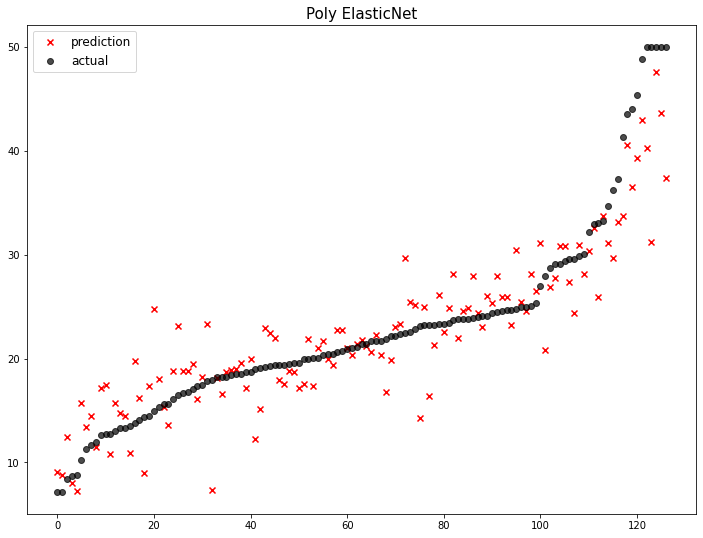

                       model        mse
0           Lasso(alpha=100)  69.257901
1            Lasso(alpha=10)  47.368052
2             Lasso(alpha=1)  32.081372
3   ElasticNet(l1_ratio=0.2)  30.300819
4   ElasticNet(l1_ratio=0.5)  30.182668
5   ElasticNet(l1_ratio=0.8)  29.986483
6           Lasso(alpha=0.1)  29.438430
7           Ridge(alpha=100)  29.421974
8        Standard ElasticNet  28.515383
9     No Standard ElasticNet  28.515383
10           Ridge(alpha=10)  28.412640
11            Ridge(alpha=1)  27.519149
12         Lasso(alpha=0.01)  27.257623
13          Ridge(alpha=0.1)  27.018254
14        Lasso(alpha=0.001)  26.971656
15         Ridge(alpha=0.01)  26.951444
16       Lasso(alpha=0.0001)  26.946658
17        Ridge(alpha=0.001)  26.944677
18       Ridge(alpha=0.0001)  26.944000
19          LinearRegression  26.943925
20           Poly ElasticNet  16.581875


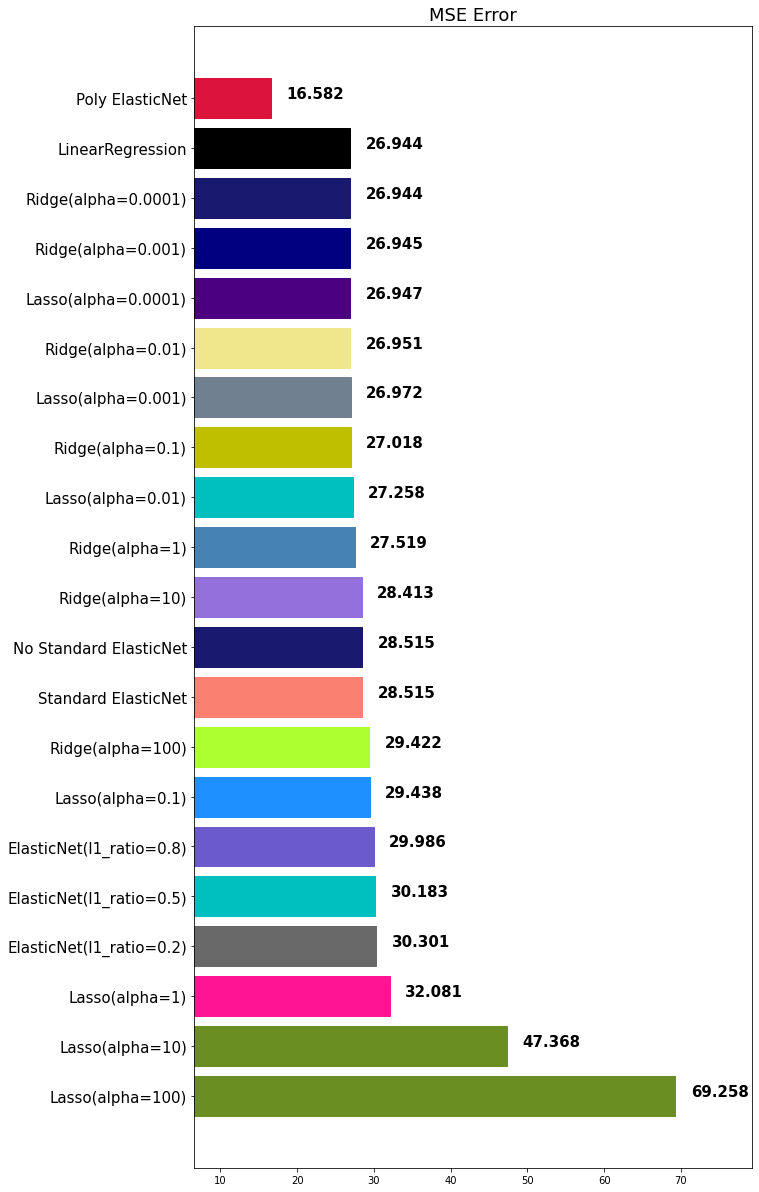

In [73]:
mse_eval('Poly ElasticNet', poly_pred, y_test)